In [1]:
from gm_age_relation import *

In [2]:
# initialze the GALAH training

GM = GM_Age_GALAH('../500_pc_KM_rv_cross_match/')

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['zgal_gaia'][cat['zgal_gaia'] < -1000] = np.nan

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['UVel_gaia'][cat['UVel_gaia'] < -1000] = np.nan

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat

100%|██████████| 100/100 [00:00<00:00, 1492.54it/s]


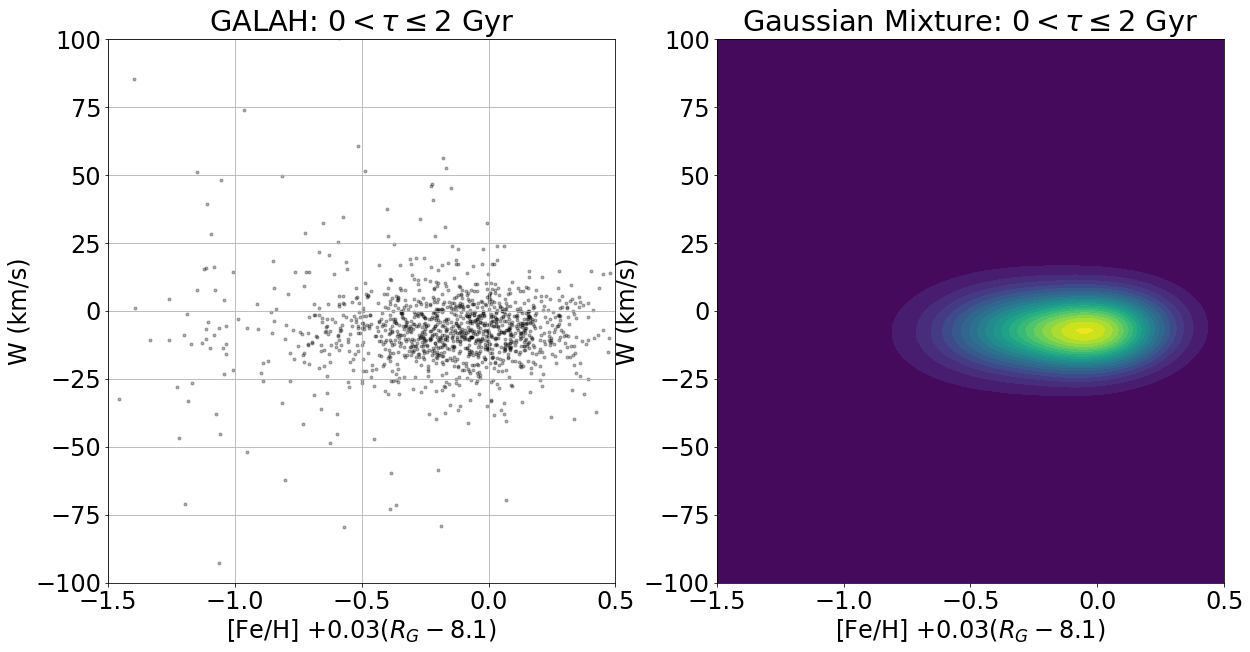

100%|██████████| 100/100 [00:00<00:00, 1187.16it/s]


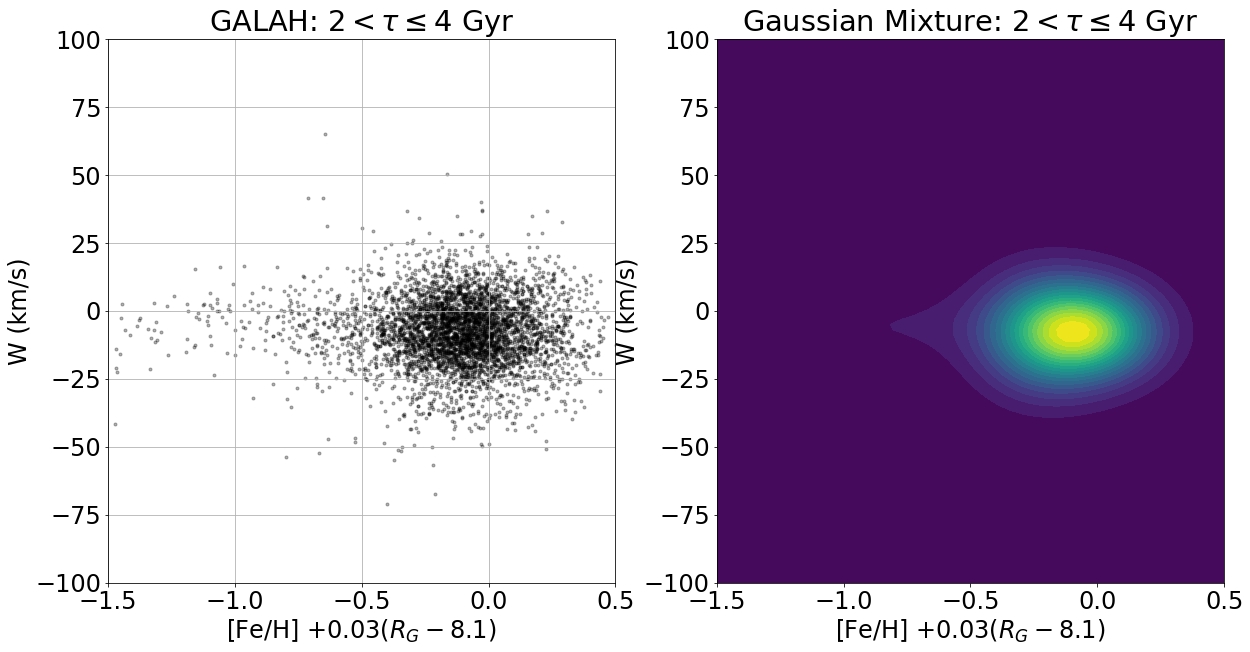

100%|██████████| 100/100 [00:00<00:00, 1055.19it/s]


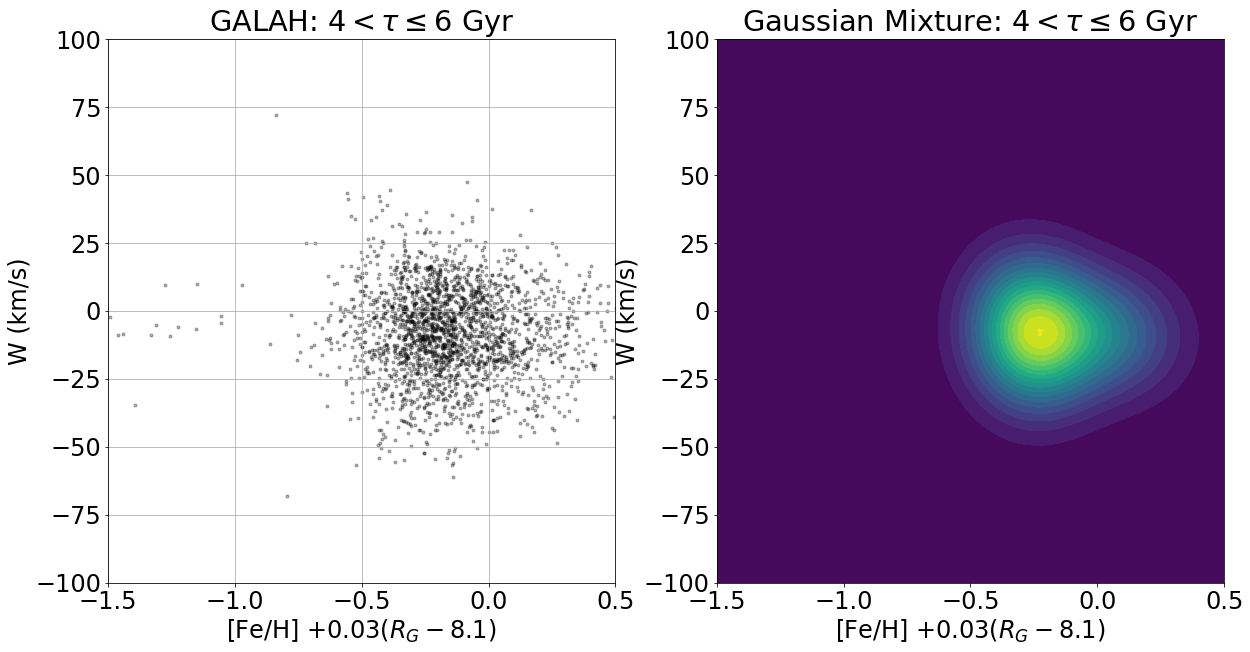

100%|██████████| 100/100 [00:00<00:00, 1020.07it/s]


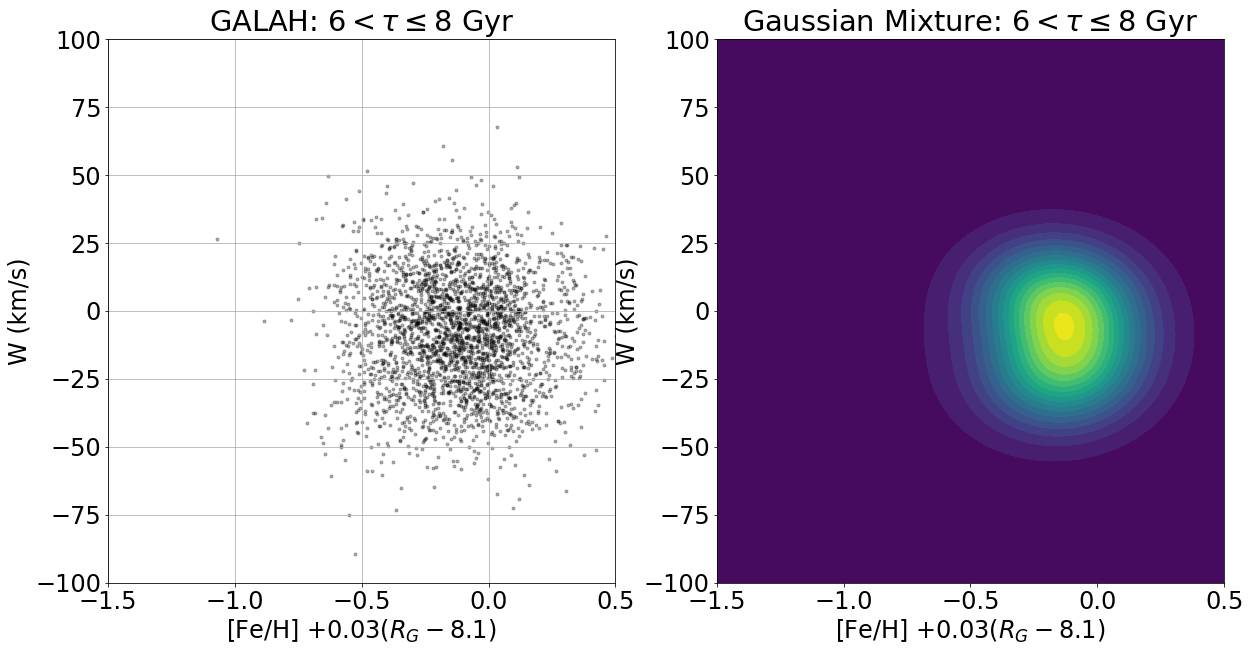

100%|██████████| 100/100 [00:00<00:00, 1487.10it/s]


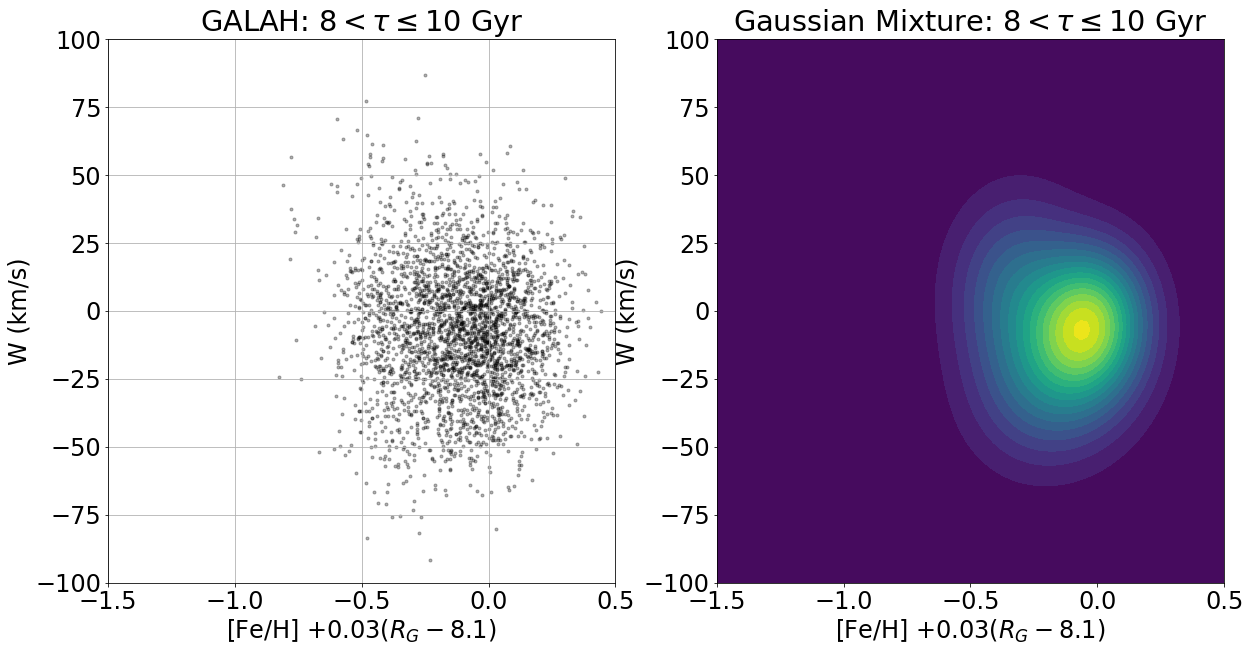

100%|██████████| 100/100 [00:00<00:00, 2213.61it/s]


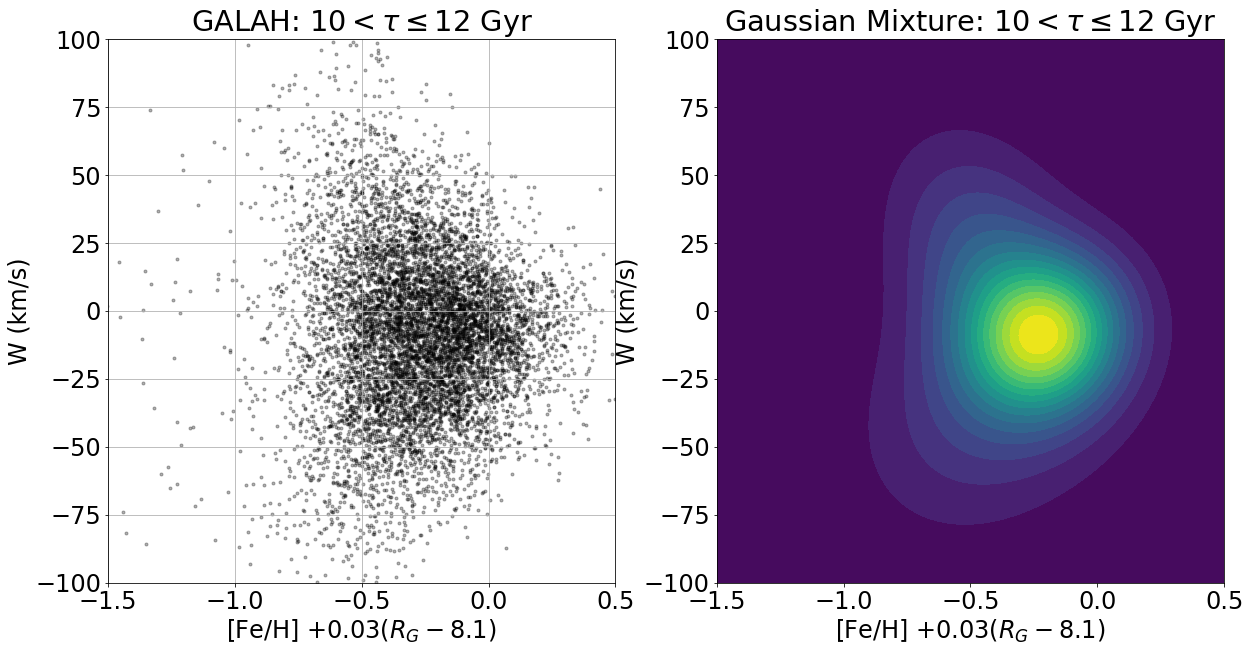

100%|██████████| 100/100 [00:00<00:00, 1564.72it/s]


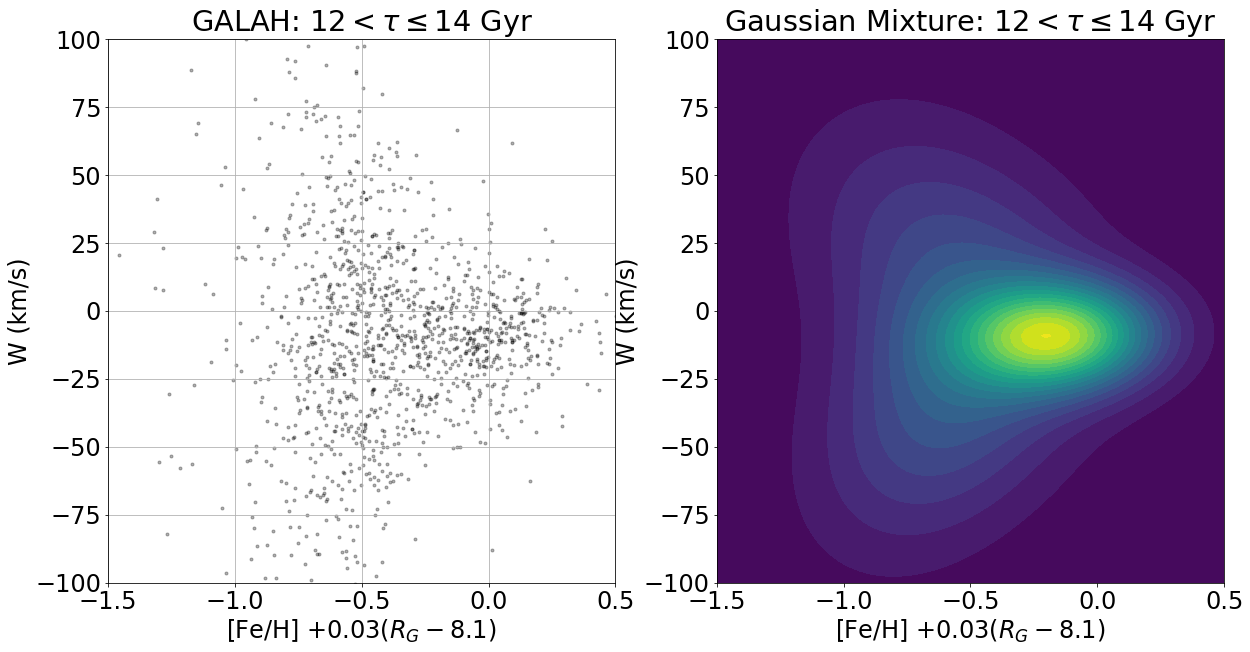

In [3]:
# get the GM models from GALAH
GM.find_GMMs(plot_dir='paper_plots')

In [4]:
KM = KM_metals(metals_file='gaia_DR3_photo_metallicities.txt',
               gaia_file='gaia_file/gaia_K_dwarf_RV_DR3-result.csv')

/Users/imedan/anaconda3/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)

/Users/imedan/anaconda3/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)



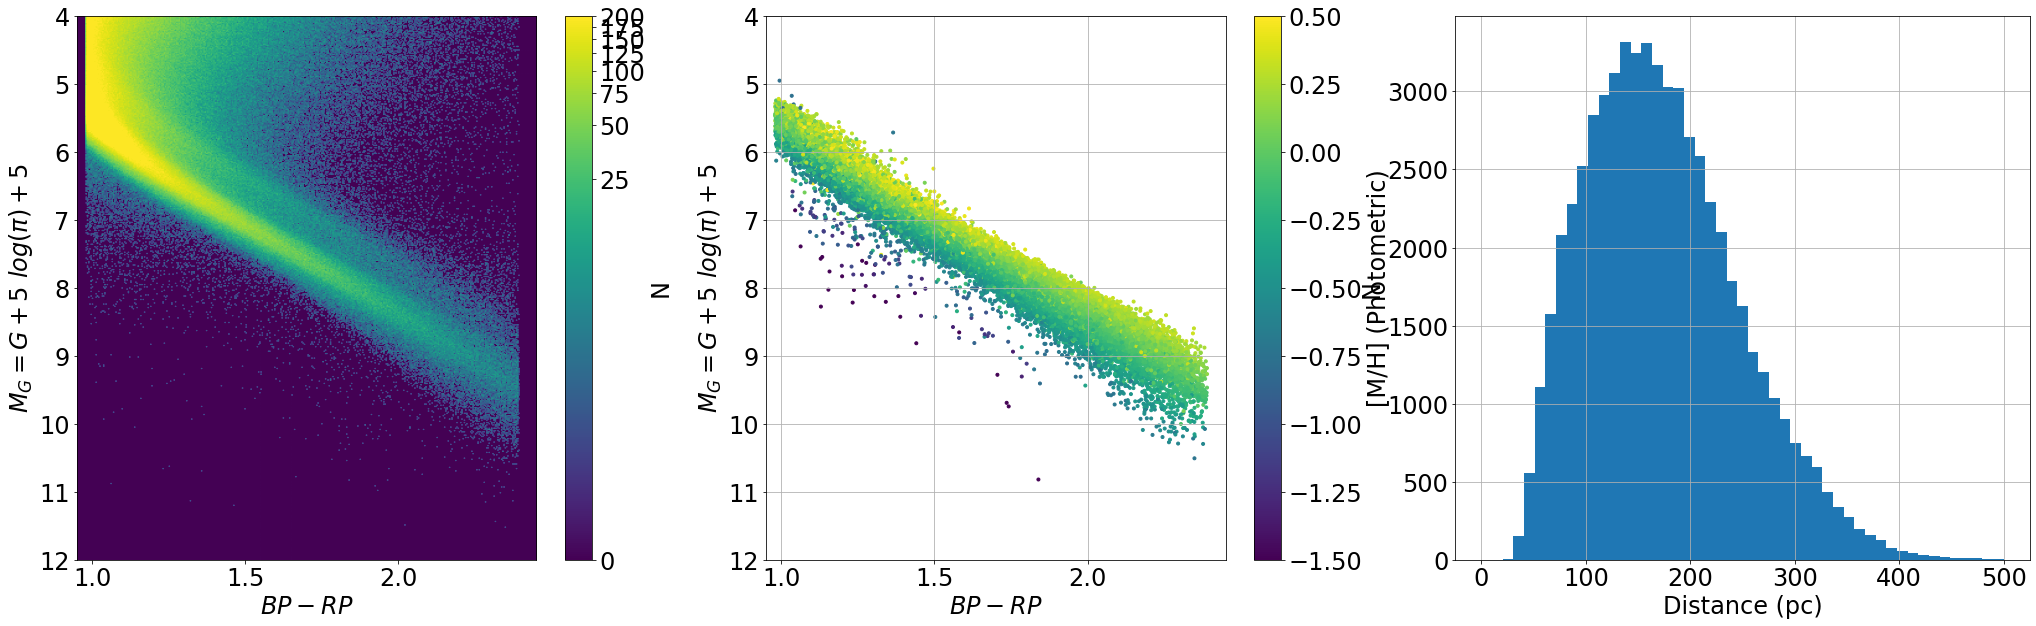

In [5]:
# make figure 1 in the table
import mpl_scatter_density
import numpy as np

from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=200, stretch=LogStretch())

gaia = pd.read_csv('gaia_file/gaia_K_dwarf_RV_DR3-result.csv',
                    usecols=[0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 15],
                    names=['RA', 'DEC', 'ID', 'plx', 'pmra',
                           'pmde', 'G', 'BP', 'RP', 'rv', 'rv_err'],
                    skiprows=1)

fig = plt.figure(figsize=(35, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='scatter_density')
dens = ax1.scatter_density(gaia['BP'] - gaia['RP'],
                           gaia['G'] + 5 * np.log10(1e-3 * gaia['plx']) + 5,
                           norm=norm)
plt.colorbar(dens, ax=ax1, label='N')
ax1.set_xlabel(r'$BP-RP$')
ax1.set_ylabel(r'$M_G = G + 5 \ log(\pi) + 5$')
ax1.set_xlim((0.95, 2.45))
ax1.set_ylim((4, 12))
ax1.invert_yaxis()

ax2 = fig.add_subplot(1, 3, 2)
dens = ax2.scatter(KM.KM_metals['BP'] - KM.KM_metals['RP'],
                    KM.KM_metals['G'] + 5 * np.log10(1e-3 * KM.KM_metals['plx']) + 5,
                    marker='.', c=KM.KM_metals['M_H'], vmin=-1.5, vmax=0.5)
plt.colorbar(dens, ax=ax2, label='[M/H] (Photometric)')
ax2.set_xlabel(r'$BP-RP$')
ax2.set_ylabel(r'$M_G = G + 5 \ log(\pi) + 5$')
ax2.grid()
ax2.set_xlim((0.95, 2.45))
ax2.set_ylim((4, 12))
ax2.invert_yaxis()

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(1000 / KM.KM_metals['plx'], bins=np.linspace(0, 500, 50))
ax3.grid()
ax3.set_xlabel('Distance (pc)')
ax3.set_ylabel('N')

plt.savefig('paper_plots/photo_metallciities_gaia_hr_ext_corr.png', dpi=100,
            bbox_inches='tight')

plt.show()

In [6]:
KM.assign_kinematic_groups(plot_groups=False)

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.KM_metals['group'][ev] = n

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stream_dfs['%d' % i]['group_pca_sig'][ev] = sig_cut

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stream_dfs['%

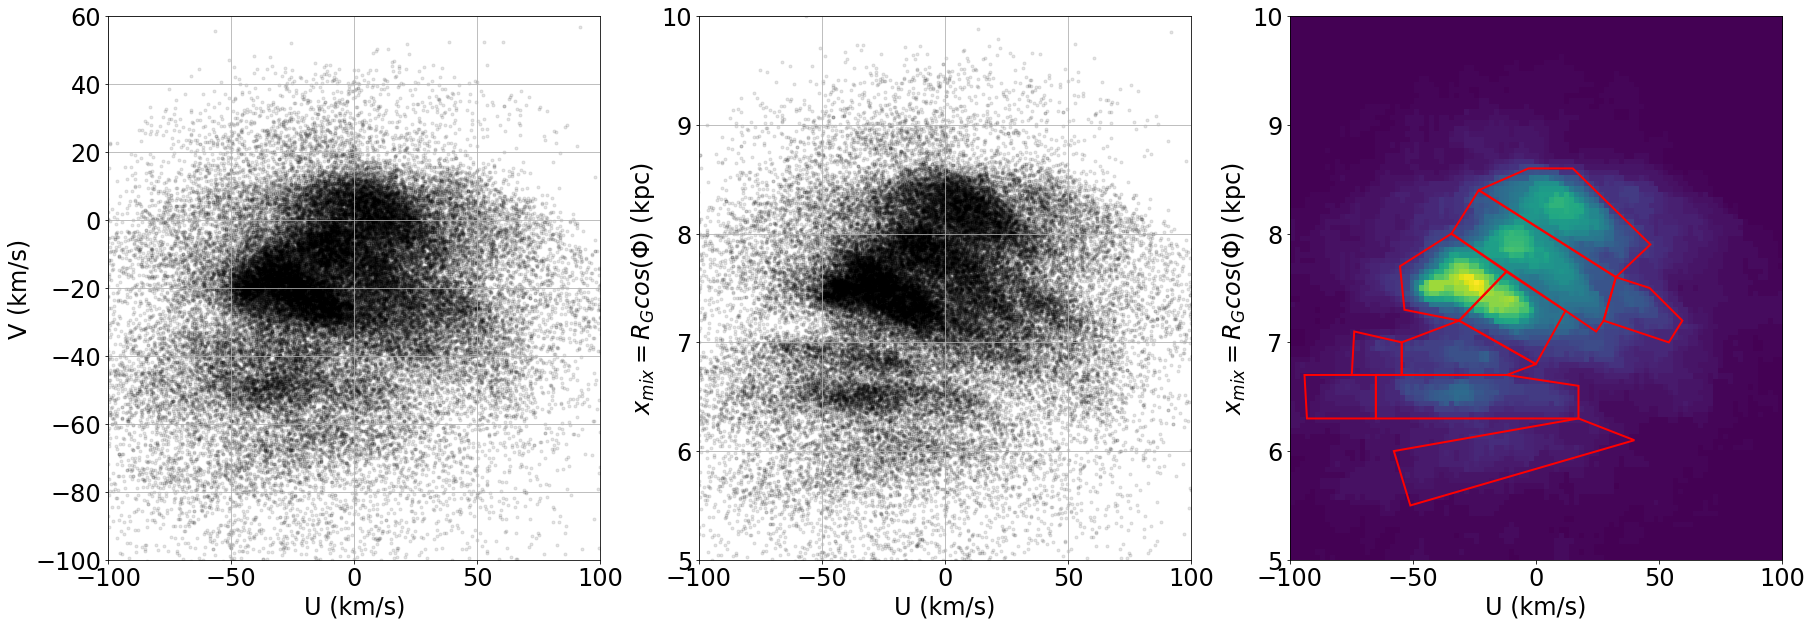

In [7]:
# make figure 3 for the paper
from scipy.stats import binned_statistic_2d
from scipy.ndimage import gaussian_filter, median_filter



f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

ax1.scatter(KM.KM_metals['gu'], KM.KM_metals['gv'], c='k', marker='.', alpha=0.1)
ax1.set_xlabel('U (km/s)')
ax1.set_ylabel('V (km/s)')
ax1.grid()
ax1.set_xlim((-100, 100))
ax1.set_ylim((-100, 60))

ax2.scatter(KM.KM_metals['gu'], KM.KM_metals['xmix'], c='k', marker='.', alpha=0.1)
ax2.set_xlabel('U (km/s)')
ax2.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
ax2.grid()
ax2.set_xlim((-100, 100))
ax2.set_ylim((5, 10))

stat0, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'], 
                                           KM.KM_metals['xmix'],
                                           KM.KM_metals['gu'], statistic='count', 
                                           bins=[np.linspace(-100,100,100),
                                                 np.linspace(5,10,100)])
smooth = median_filter(stat0, 4)
ax3.imshow(smooth.T, origin='lower', interpolation=None, aspect='auto',
           extent=[xe0.min(), xe0.max(), ye0.min(), ye0.max()])
ax3.set_xlabel('U (km/s)')
ax3.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
ax3.set_xlim((-100, 100))
ax3.set_ylim((5, 10))
KM.polygons = KM.init_polygons()
for poly in KM.polygons:
    ax3.add_patch(poly)

plt.savefig('paper_plots/UV_vs_xmix_w_initial_polys_ext_corr.png', dpi=100,
            bbox_inches='tight')
plt.show()



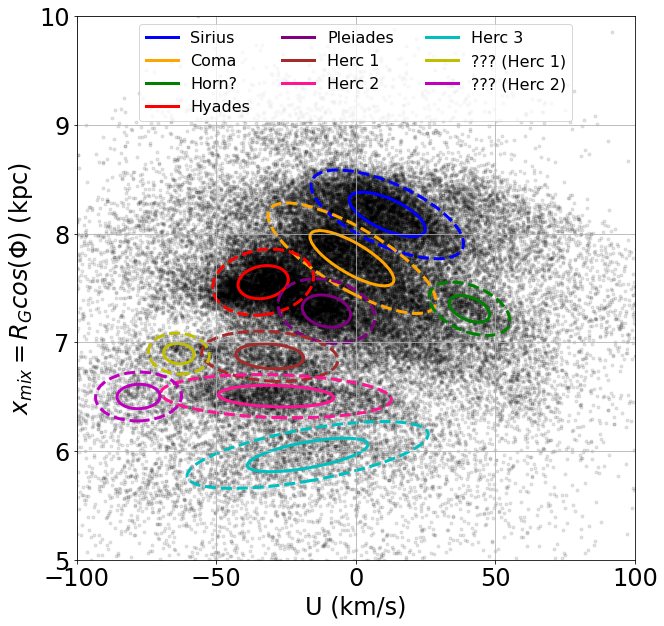

In [11]:
# figure 4

from matplotlib.patches import Ellipse

cs = ['b','orange','g','red','purple','brown','deeppink','c','y','m']
names = ['Sirius','Coma','Horn?','Hyades','Pleiades','Herc 1',
         'Herc 2', 'Herc 3', '??? (Herc 1)', '??? (Herc 2)']



f, ax1 = plt.subplots(1, 1, figsize=(10, 10))

ax1.scatter(KM.KM_metals['gu'], KM.KM_metals['xmix'], c='k', marker='.', alpha=0.1)
ax1.set_xlabel('U (km/s)')
ax1.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
ax1.grid()
ax1.set_xlim((-100, 100))
ax1.set_ylim((5, 10))

for i in range(len(cs)):
    ax1.plot([0], [0], c=cs[i], lw=3, label=names[i])
    e = Ellipse(xy=[KM.mean1[i], KM.mean2[i]], 
                width=(2 / 3) * KM.std1[i] * 2,
                height=(2 / 3) * KM.std2[i] * 2, 
                angle=KM.angles[i],
                edgecolor=cs[i], lw=3, facecolor='none',linestyle='--')
    ax1.add_artist(e)
    e = Ellipse(xy=[KM.mean1[i], KM.mean2[i]], 
                width=(1 / 3) * KM.std1[i] * 2,
                height=(1 / 3) * KM.std2[i] * 2, 
                angle=KM.angles[i],
                edgecolor=cs[i], lw=3, facecolor='none')
    ax1.add_artist(e)
ax1.legend(loc='upper center',ncol=3, prop={'size': 16})
plt.savefig('paper_plots/UV_PCA_ellipses_ext_corr.png', dpi=100, bbox_inches='tight')
plt.show()

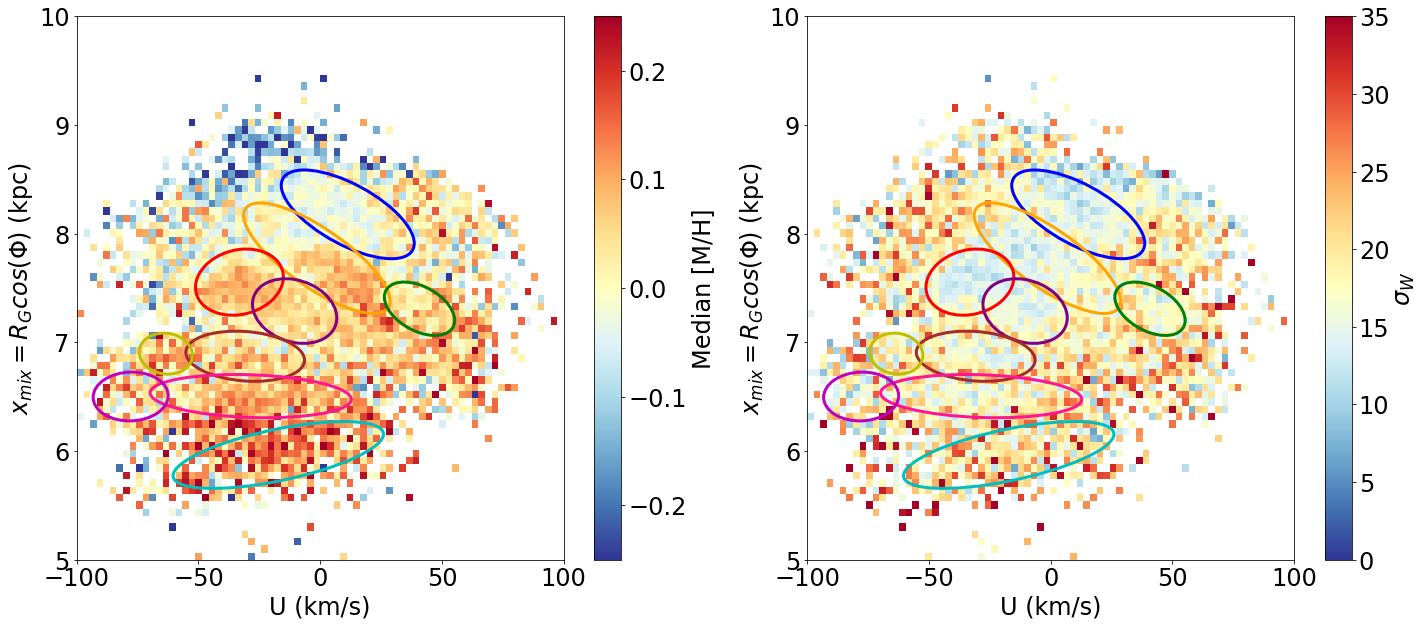

In [15]:
# figure 5
stat_count, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'],
                                                KM.KM_metals['xmix'],
                                                KM.KM_metals['M_H'],
                                                statistic='count', 
                                                bins=[np.linspace(-100,100,75),
                                                      np.linspace(5,10,75)])

statMH, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'],
                                            KM.KM_metals['xmix'],
                                            KM.KM_metals['M_H'],
                                            statistic='median', 
                                            bins=[np.linspace(-100,100,75),
                                                  np.linspace(5,10,75)])

statMH[stat_count < 5] = np.nan

statW, xe0, ye0, bn0 = binned_statistic_2d(KM.KM_metals['gu'],
                                           KM.KM_metals['xmix'],
                                           KM.KM_metals['gw'],
                                           statistic='std', 
                                           bins=[np.linspace(-100,100,75),
                                                 np.linspace(5,10,75)])

statW[stat_count < 5] = np.nan

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

dens = ax1.imshow(statMH.T, origin='lower', interpolation=None, aspect='auto',
                  extent=[xe0.min(),xe0.max(),ye0.min(),ye0.max()],
                  cmap='RdYlBu_r',vmin=-0.25,vmax=0.25)
plt.colorbar(dens, label='Median [M/H]', ax=ax1)

dens = ax2.imshow(statW.T, origin='lower', interpolation=None, aspect='auto',
                  extent=[xe0.min(),xe0.max(),ye0.min(),ye0.max()],
                  cmap='RdYlBu_r',vmin=0,vmax=35)
plt.colorbar(dens, label=r'$\sigma_W$', ax=ax2)

for ax in [ax1, ax2]:
    ax.set_xlabel('U (km/s)')
    ax.set_ylabel(r'$x_{mix}=R_G cos(\Phi)$ (kpc)')
    ax.set_xlim((-100, 100))
    ax.set_ylim((5, 10))
    for i in range(len(cs)):
        e = Ellipse(xy=[KM.mean1[i], KM.mean2[i]], 
                    width=(2 / 3) * KM.std1[i] * 2,
                    height=(2 / 3) * KM.std2[i] * 2, 
                    angle=KM.angles[i],
                    edgecolor=cs[i], lw=3, facecolor='none')
        ax.add_artist(e)

plt.savefig('paper_plots/xmix_vs_U_heat_map_w_labels.png', dpi=100, bbox_inches='tight')
plt.show()
    

